## Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 제출 방법: GitHub (10/28 자정까지)
* 파일 이름: A4-학번-이름(영어로).iphynb 형식으로 (예: A4-13403-999-jiyoon.iphynb)

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



### Q1: 긍정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

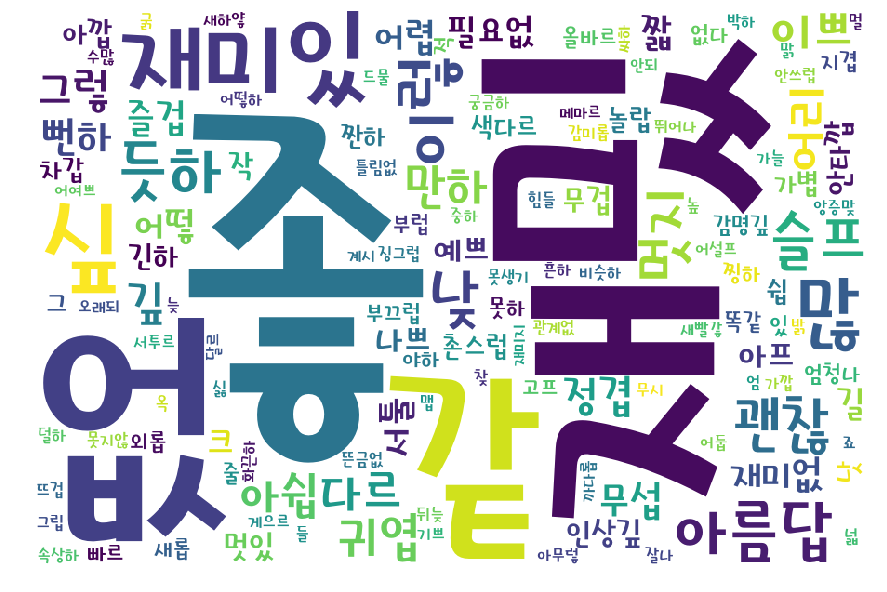

In [1]:
from random import sample
from collections import Counter
from konlpy.tag import Kkma
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

kkma = Kkma()

file = pd.read_excel('naver_ratings.xlsx', encoding='utf-8') # 텍스트 파일을 엑셀 파일로 변환
file = file.set_index('id')

good_comment = file[file.label == 1] # 긍정적인 리뷰는 label이 1이므로 1을 가지고 있는 데이터만 필터링
good_comment_list = [str(good_comment.document.iloc[i]) for i in range(len(good_comment))] # 이 가운데 실제 코멘트만 추려서 리스트로 만든다

random_good_comment = sample(good_comment_list, 1000) # list에서 1000개를 추려낸다
random_good_comment_tags = [kkma.pos(random_good_comment[i]) for i in range(len(random_good_comment))] # 모든 형태소의 품사 tagging

# 많이 사용된 형용사 찾기
good_adjective_list = []
for sent in random_good_comment_tags:
    for name, tag in sent:
        if tag in ['VA', 'VXA']: # 형용사의 태그
            good_adjective_list.append(name)

common_good_adjective = Counter(good_adjective_list)

# Word Cloud 만들기
cloud = WordCloud(width=900, height=600,
                 font_path = "‪C:\Windows\Fonts\HoonPinkpungchaR.otf",
                 background_color = "white")
cloud = cloud.fit_words(common_good_adjective)

# matplotlib으로 디테일 조정
plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 위의 코드와 다르게 텍스트 파일을 활용해서 작성해보았습니다.

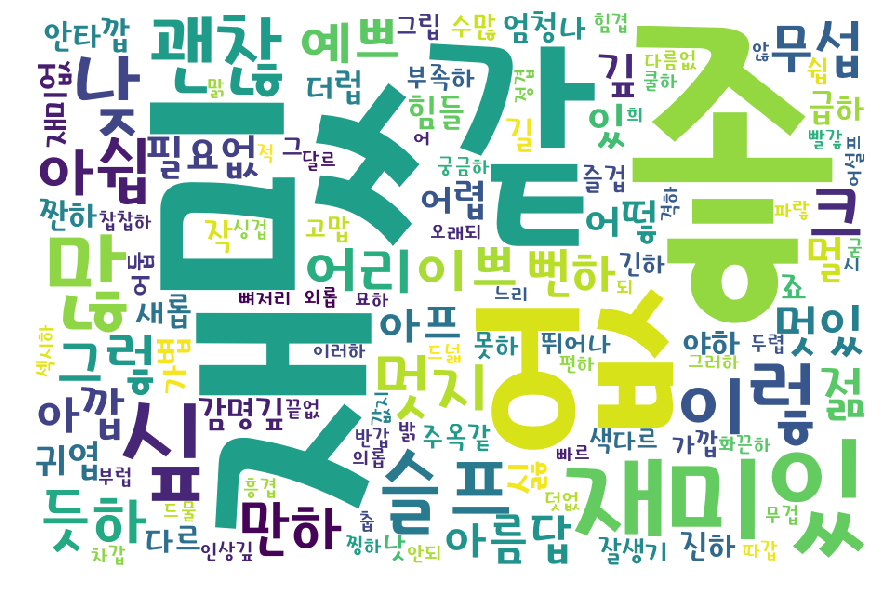

In [2]:
with open('naver_ratings.txt', 'r', encoding='utf8') as f:
    file2 = f.read().splitlines() # file2의 문장들을 끊어서 하나의 리스트로 만든다
comment = [file2[i].split('\t') for i in range(len(file2))] # file2의 문장을 '\t' 단위로 끊어서 다시 리스트로 만든다

"""이때 리스트의 element인 문장도 지금 id-document-label 단위로 잘린 리스트이므로 
각 element의 index 2가 1이면 호평이고, 이러한 element의 documnet만 골라서 새로운 리스트에 추가한다"""

good_comment = [sent[1] for sent in comment if sent[2] == '1']
random_good_comments = sample(good_comment, 1000)

# 형태소 분석
random_good_comments_tagged = [kkma.pos(random_good_comments[i]) for i in range(len(random_good_comments))]

good_adj = []
for sent in random_good_comments_tagged:
    for word, tag in sent:
        if tag in ['VA', 'VXA']:
            good_adj.append(word) # 태그가 형용사의 태그이면 good_adj라는 리스트에 추가

            # 위의 코드는 good_adj = [word for sent in random_good_comments_tagged for word, tag in sent if tag in ['VA', 'VXA']]로 쓸 수 있다
good_adj_counts = Counter(good_adj)
cloud = WordCloud(width=900, height=600,
                 font_path = "‪C:\Windows\Fonts\HoonPinkpungchaR.otf",
                 background_color = "white")

cloud = cloud.fit_words(good_adj_counts)

# matplotlib으로 디테일 조정
plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### Q2: 부정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

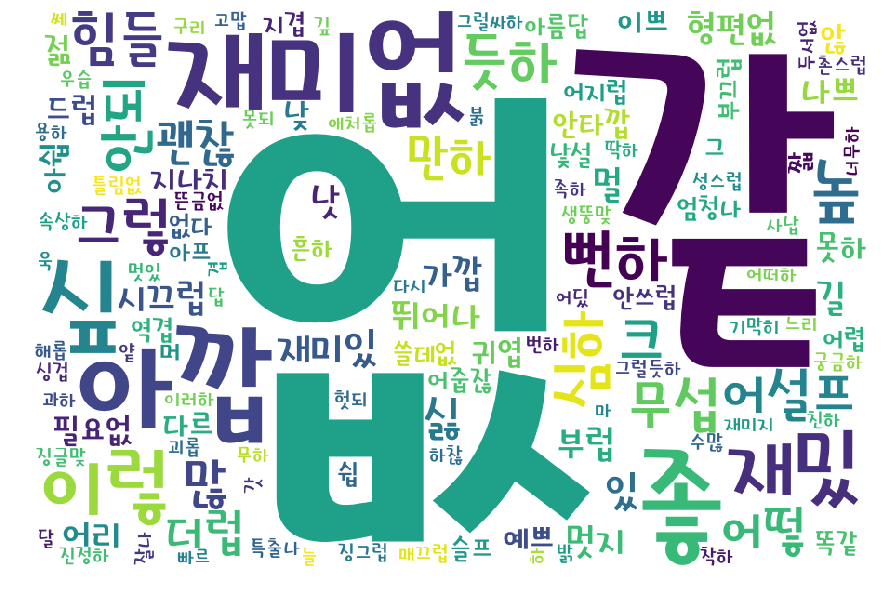

In [4]:
bad_comment = file[file.label == 0] # 부정적인 리뷰는 label이 0이므로 0을 가지고 있는 데이터만 필터링
bad_comment_list = [bad_comment.document.iloc[i] for i in range(len(bad_comment))] # 이 가운데 실제 코멘트만 추려서 리스트로 만든다
bad_comment_list = [str(bad_comment_list[i]) for i in range(len(bad_comment_list))] # 리스트의 element를 모두 string으로 바꾼다

random_bad_comment = sample(bad_comment_list, 1000) # list에서 1000개를 추려낸다
random_bad_comment_tags = [kkma.pos(random_bad_comment[i]) for i in range(len(random_bad_comment))] # 모든 형태소의 품사 tagging

# 많이 사용된 형용사 찾기
bad_adjective_list = []
for sent in random_bad_comment_tags:
    for name, tag in sent:
        if tag in ['VA', 'VXA']: # 형용사의 태그
            bad_adjective_list.append(name)

common_bad_adjective = Counter(bad_adjective_list)

# Word Cloud 만들기
cloud = WordCloud(width=900, height=600,
                 font_path = "‪C:\Windows\Fonts\HoonPinkpungchaR.otf",
                 background_color = "white")

cloud = cloud.fit_words(common_bad_adjective)

# matplotlib으로 디테일 조정
plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### 위의 코드와 다르게 텍스트 파일을 활용해서 작성해보았습니다.

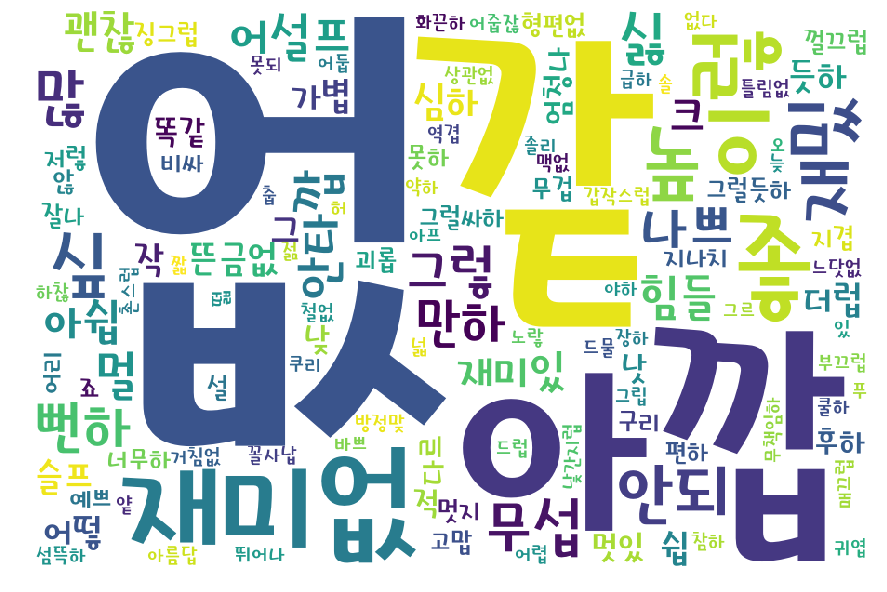

In [3]:
bad_comment = [sent[1] for sent in comment if sent[2] == '0']
random_bad_comments = sample(bad_comment, 1000)

# 형태소 분석
random_bad_comments_tagged = [kkma.pos(random_bad_comments[i]) for i in range(len(random_bad_comments))]
bad_adj = [word for sent in random_bad_comments_tagged for word, tag in sent if tag in ['VA', 'VXA']]

# 태그가 형용사의 태그이면 bad_adj라는 리스트에 추가
bad_adj_counts = Counter(bad_adj)

cloud = WordCloud(width=900, height=600,
                 font_path = "‪C:\Windows\Fonts\HoonPinkpungchaR.otf",
                 background_color = "white")

cloud = cloud.fit_words(bad_adj_counts)

# matplotlib으로 디테일 조정
plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(cloud)
plt.show()